# Chapter 04: Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The case of two linearly separable classes

The blue dots are labeled negatively and the red crosses are labeled positively.

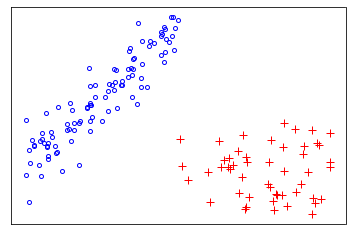

In [2]:
# generate the data
np.random.seed(1)                                              # comment out this line to generate a different dataset
m0 = 100
m1 = 50
X0_x = np.random.uniform(0,1,m0)                               # abscissae of the blue dots
X0_y = 3/2*X0_x + 1/2 + np.random.normal(0,0.2,m0)             # their ordinates
X0 = np.column_stack((X0_x,X0_y))
X1_x = np.random.uniform(1,2,m1)                               # abscissae of the red crosses
X1_y = np.random.uniform(0,1,m1)                               # their ordinates
X1 = np.column_stack((X1_x,X1_y))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
plt.xticks([])
plt.yticks([])
plt.show()

#### The separating "hyperplane" produced by a linear feasibility program

In [3]:
from scipy.optimize import linprog

In [4]:
# create a dummy objective function
c = [0,0,0]
# create the inequality constraints (of type Az <= b)
X0_tilde = np.column_stack((X0,np.ones((m0,1))))
X1_tilde = np.column_stack((X1,np.ones((m1,1))))
A = np.row_stack( (-X0_tilde,X1_tilde) )
b = -np.ones(m0+m1)
# solve the linear program
res = linprog(c, A_ub=A, b_ub=b, bounds=(None,None))
w_feas = res.x[0:2]
b_feas = -res.x[2]

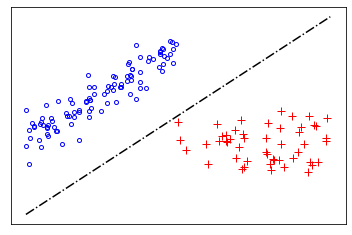

In [5]:
# visualize the "hyperplane" produced by a linear feasibility program (in black)
grid_x = np.linspace(0,2,20)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
plt.plot(grid_x,(-w_feas[0]*grid_x+b_feas)/w_feas[1],'k-.')
plt.xticks([])
plt.yticks([])
plt.show()

#### The separating "hyperplane" produced by the perceptron algorithm

In [6]:
from numpy import linalg as LA

In [7]:
X_tilde = np.row_stack((X0_tilde,X1_tilde))
y = np.row_stack((-np.ones((m0,1)),np.ones((m1,1))))
w_tilde = np.zeros((3,1))
obj_perc = y*(X_tilde@w_tilde)    # to be entrywise positive at the end of the loop
while min(obj_perc)<=0:
    i = np.argmin(obj_perc)
    w_tilde = w_tilde + (y[i]/LA.norm(X_tilde[i,:])**2)*np.transpose([X_tilde[i,:]])
    obj_perc = y*(X_tilde@w_tilde)
w_perc = w_tilde[0:2]
b_perc = -w_tilde[2]

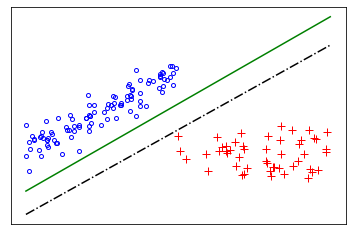

In [8]:
# visualize the "hyperplane" produced by the perceptrom algorithm (in green)    
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
plt.plot(grid_x,(-w_feas[0]*grid_x+b_feas)/w_feas[1],'k-.')
plt.plot(grid_x,(-w_perc[0]*grid_x+b_perc)/w_perc[1],'g')
plt.xticks([])
plt.yticks([])
plt.show()

#### The separating "hyperplane" produced by hard SVM

In [9]:
import cvxpy as cp

In [10]:
# define the variables
w = cp.Variable(2)
b = cp.Variable(1)
# define the objective function
objective = cp.Minimize(cp.norm(w,2))
# define the inequality constraints
constraints = [X0@w - b <= -1]
constraints += [X1@w - b >= 1]
# solve the optimization problem
hard_SVM = cp.Problem(objective, constraints)
hard_SVM.solve()
w_hsvm = w.value
b_hsvm = b.value

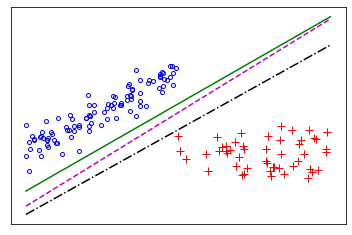

In [11]:
# visualize the "hyperplane" produced by hard SVM (in magenta)
grid_x = np.linspace(0,2,20)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
plt.plot(grid_x,(-w_feas[0]*grid_x+b_feas)/w_feas[1],'k-.')
plt.plot(grid_x,(-w_perc[0]*grid_x+b_perc)/w_perc[1],'g')
plt.plot(grid_x,(-w_hsvm[0]*grid_x+b_hsvm)/w_hsvm[1],'m--')
plt.xticks([])
plt.yticks([])
plt.show()

## The case of two almost linearly separable classes 

The blue dots are still labeled negatively and the red crosses are still labeled positively.

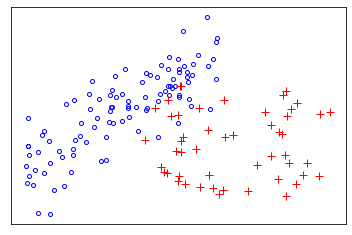

In [12]:
# generate the data 
m0 = 100
m1 = 50
X0_x = np.random.uniform(0,1,m0)                                  # abscissae of the blue dots
X0_y = X0_x + 1/4 + np.random.normal(0,0.2,m0)                    # their ordinates
X0 = np.column_stack((X0_x,X0_y))
X1_x = np.random.uniform(0.6,1.6,m1)                              # abscissae of the red crosses
X1_y = np.random.uniform(0,1,m1)                                  # their ordinates
X1 = np.column_stack((X1_x,X1_y))
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
plt.xticks([])
plt.yticks([])
plt.show()

#### The "hyperplane" produced by soft SVM

In [13]:
# define the variables
w = cp.Variable(2)
b = cp.Variable(1)
xi = cp.Variable(m0+m1,pos=True)
# define the objective function
lamb = 1e-3
objective = cp.Minimize(cp.norm(w,2)+cp.sum(xi)/lamb)
# define the inequality constraints
constraints = [X0@w - b <= -1+xi[0:m0]]
constraints += [X1@w - b >= 1-xi[m0:m0+m1]]
# solve the optimization problem
soft_SVM = cp.Problem(objective, constraints)
soft_SVM.solve()
w_ssvm = w.value
b_ssvm = b.value

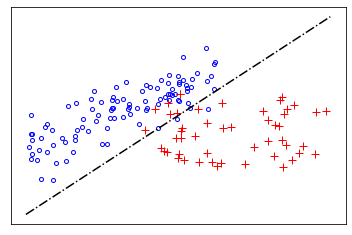

In [14]:
# visualize the "hyperplane" produced by soft SVM
grid_x = np.linspace(0,1.6,20)
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
plt.plot(grid_x,(-w_ssvm[0]*grid_x+b_ssvm)/w_ssvm[1],'k-.')
plt.xticks([])
plt.yticks([])
plt.show()

## The case of two classes clearly not lineary separable

Here is a function performing kernel SVM for a generic kernel.

In [15]:
def kernel_svm(K,lamb,m0,m1):
    # define the variables
    a = cp.Variable(m0+m1)
    b = cp.Variable(1)
    xi = cp.Variable(m0+m1,pos=True)
    # define the objective function
    objective = cp.Minimize(cp.quad_form(a,K)+cp.sum(xi)/lamb)
    # define the inequality constraints
    constraints = [K[0:m0,:]@a - b <= -1+xi[0:m0]]
    constraints += [K[m0:m0+m1,:]@a - b >= 1-xi[m0:m0+m1]]
    # solve optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve(solver='ECOS')
    # return the outputs
    return a.value, b.value

### In the first example, one utilizes a polynomial kernel.
As usual, the blue dots are labeled negatively and the red crosses positively.

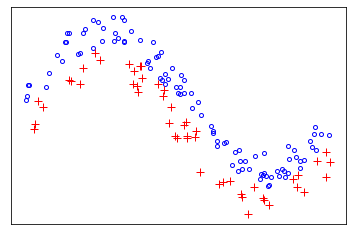

In [16]:
# generate the data
m0 = 100;
m1 = 50;
X0_x = np.random.uniform(0,6,m0)                     # abscissae of thr blue dots
X0_y = np.sin(X0_x) + np.random.uniform(0,0.5,m0)    # their ordinates
X0 = np.column_stack( (X0_x, X0_y) )
X1_x = np.random.uniform(0,6,m1)                     # abscissae of the red crosses
X1_y = np.sin(X1_x) - np.random.uniform(0,0.5,m1)    # their ordinates
X1 = np.column_stack( (X1_x, X1_y) )
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+', markerfacecolor='none',markersize=8)
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
# Soft SVM with a polynomial kernel
X = np.row_stack( (X0,X1) )
K_poly = (1+X@np.transpose(X))**3
lamb = 1e-2
a_poly,b_poly = kernel_svm(K_poly,lamb,m0,m1)

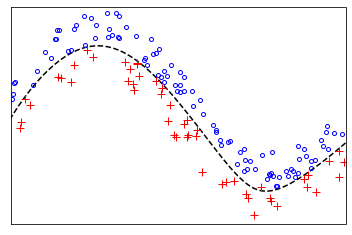

In [18]:
# visualize the boundary produced by SVM with the polynomial kernel
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
grid_x = np.linspace(0,6,100)
grid_y = np.linspace(-1.5,1.5,100)
xx,yy = np.meshgrid(grid_x,grid_y)
f = sum( ( a_poly[i] *(1+X[i,0]*xx+X[i,1]*yy)**3 for i in range(m0+m1) ) )  
plt.contour(grid_x,grid_y,f-b_poly,0, colors='k',linestyles='dashed')
plt.xticks([])
plt.yticks([])
plt.show()

### In the second example, one utilizes an exponential kernel.
As usual, the blue dots are labeled negatively and the red crosses positively.

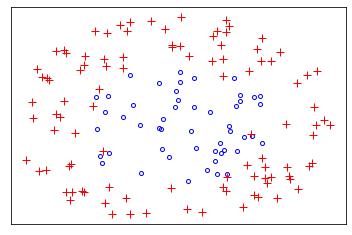

In [19]:
# generate the data
m0 = 50
m1 = 100
r0 = 1.1*np.sqrt(np.random.uniform(0,1,m0))
theta0 = np.random.uniform(0,2*np.pi,m0)
r1 = 0.8 + np.sqrt(np.random.uniform(0,1,m1))
theta1 = np.random.uniform(0,2*np.pi,m1)
X0 = np.column_stack( (r0*np.cos(theta0), r0*np.sin(theta0)) )
X1 = np.column_stack( (r1*np.cos(theta1), r1*np.sin(theta1)) )
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:
# Soft SVM with an exponential kernel
X = np.row_stack( (X0,X1) )
m = m0+m1
K_expo = np.zeros((m,m))
sigma = 1
for i in range(m):
    for j in range(m):
        K_expo[i,j] = np.exp(-LA.norm(X[i,:]-X[j,:])/(2*sigma**2))
lamb = 1e-1
a_expo,b_expo = kernel_svm(K_expo,lamb,m0,m1)

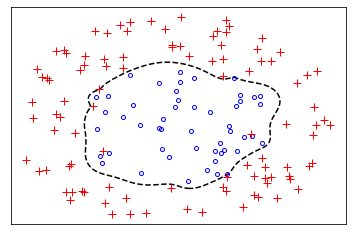

In [21]:
# visualize the boundary produced by SVM with the exponential kernel
plt.plot(X0[:,0],X0[:,1],'b.',X1[:,0],X1[:,1],'r+',markerfacecolor='none',markersize=8)
grid_x = np.linspace(-1.5,1.5,100)
grid_y = np.linspace(-1.5,1.5,100)
xx,yy = np.meshgrid(grid_x,grid_y)
f = sum( ( a_expo[i] * np.exp( -np.sqrt((X[i,0]-xx)**2+(X[i,1]-yy)**2) / (2*sigma**2) ) for i in range(m0+m1) ) )
plt.contour(grid_x,grid_y,f-b_expo,0, colors='k',linestyles='dashed')
plt.xticks([])
plt.yticks([])
plt.show()